Underfitting vs. Overfitting
============================

Adapted from: http://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html

This example demonstrates the problems of underfitting and overfitting and
how we can use linear regression with polynomial features to approximate
nonlinear functions. The plot shows the function that we want to approximate,
which is a part of the cosine function. In addition, the samples from the
real function and the approximations of different models are displayed. The
models have polynomial features of different degrees. We can see that a
linear function (polynomial with degree 1) is not sufficient to fit the
training samples. This is called **underfitting**. A polynomial of degree 4
approximates the true function almost perfectly. However, for higher degrees
the model will **overfit** the training data, i.e. it learns the noise of the
training data.
We evaluate quantitatively **overfitting** / **underfitting** by using
cross-validation. We calculate the mean squared error (MSE) on the validation
set, the higher, the less likely the model generalizes correctly from the
training data.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

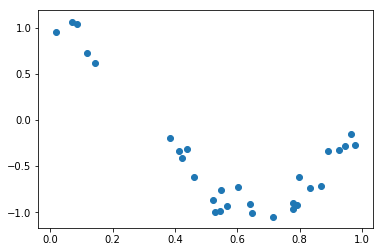

array([[ 0.5488135 ],
       [ 0.71518937],
       [ 0.60276338],
       [ 0.54488318],
       [ 0.4236548 ],
       [ 0.64589411],
       [ 0.43758721],
       [ 0.891773  ],
       [ 0.96366276],
       [ 0.38344152],
       [ 0.79172504],
       [ 0.52889492],
       [ 0.56804456],
       [ 0.92559664],
       [ 0.07103606],
       [ 0.0871293 ],
       [ 0.0202184 ],
       [ 0.83261985],
       [ 0.77815675],
       [ 0.87001215],
       [ 0.97861834],
       [ 0.79915856],
       [ 0.46147936],
       [ 0.78052918],
       [ 0.11827443],
       [ 0.63992102],
       [ 0.14335329],
       [ 0.94466892],
       [ 0.52184832],
       [ 0.41466194]])

In [2]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n = 30

# generating a train dataset
X = np.random.rand(n,1)
y = true_fun(X) + np.random.randn(n,1) * 0.1  # second term is noise

plt.scatter(X,y)
plt.show()

X

In [6]:
polynomial_features = PolynomialFeatures(degree=2, include_bias=False)
polynomial_features.fit_transform(X)

array([[  5.48813504e-01,   3.01196262e-01],
       [  7.15189366e-01,   5.11495830e-01],
       [  6.02763376e-01,   3.63323688e-01],
       [  5.44883183e-01,   2.96897683e-01],
       [  4.23654799e-01,   1.79483389e-01],
       [  6.45894113e-01,   4.17179205e-01],
       [  4.37587211e-01,   1.91482567e-01],
       [  8.91773001e-01,   7.95259085e-01],
       [  9.63662761e-01,   9.28645916e-01],
       [  3.83441519e-01,   1.47027398e-01],
       [  7.91725038e-01,   6.26828536e-01],
       [  5.28894920e-01,   2.79729836e-01],
       [  5.68044561e-01,   3.22674623e-01],
       [  9.25596638e-01,   8.56729137e-01],
       [  7.10360582e-02,   5.04612156e-03],
       [  8.71292997e-02,   7.59151487e-03],
       [  2.02183974e-02,   4.08783595e-04],
       [  8.32619846e-01,   6.93255807e-01],
       [  7.78156751e-01,   6.05527929e-01],
       [  8.70012148e-01,   7.56921138e-01],
       [  9.78618342e-01,   9.57693860e-01],
       [  7.99158564e-01,   6.38654411e-01],
       [  

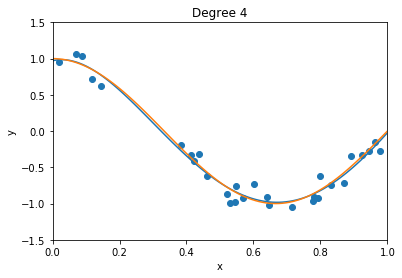

In [9]:
# try 1, 4, 15
degree = 4

polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
linear_regression = LinearRegression()
    
X_poly = polynomial_features.fit_transform(X)
linear_regression.fit(X_poly, y)

X_test = np.linspace(0, 1, 100).reshape(100,1) # 100 linearly spaced numbers from 0 to 1.
y_test = true_fun(X_test)

X_test_poly = polynomial_features.fit_transform(X_test)
y_test_pred = linear_regression.predict(X_test_poly)
    
plt.plot(X_test, y_test_pred) # Blue: model prediction on test set
plt.plot(X_test, y_test)      # Orange: test set generated using true function
plt.scatter(X, y)             # Blue dots: training instances

plt.xlabel("x")
plt.ylabel("y")
plt.xlim(0,1)
plt.ylim(-1.5,1.5)
plt.title("Degree {}".format(degree))
plt.show()